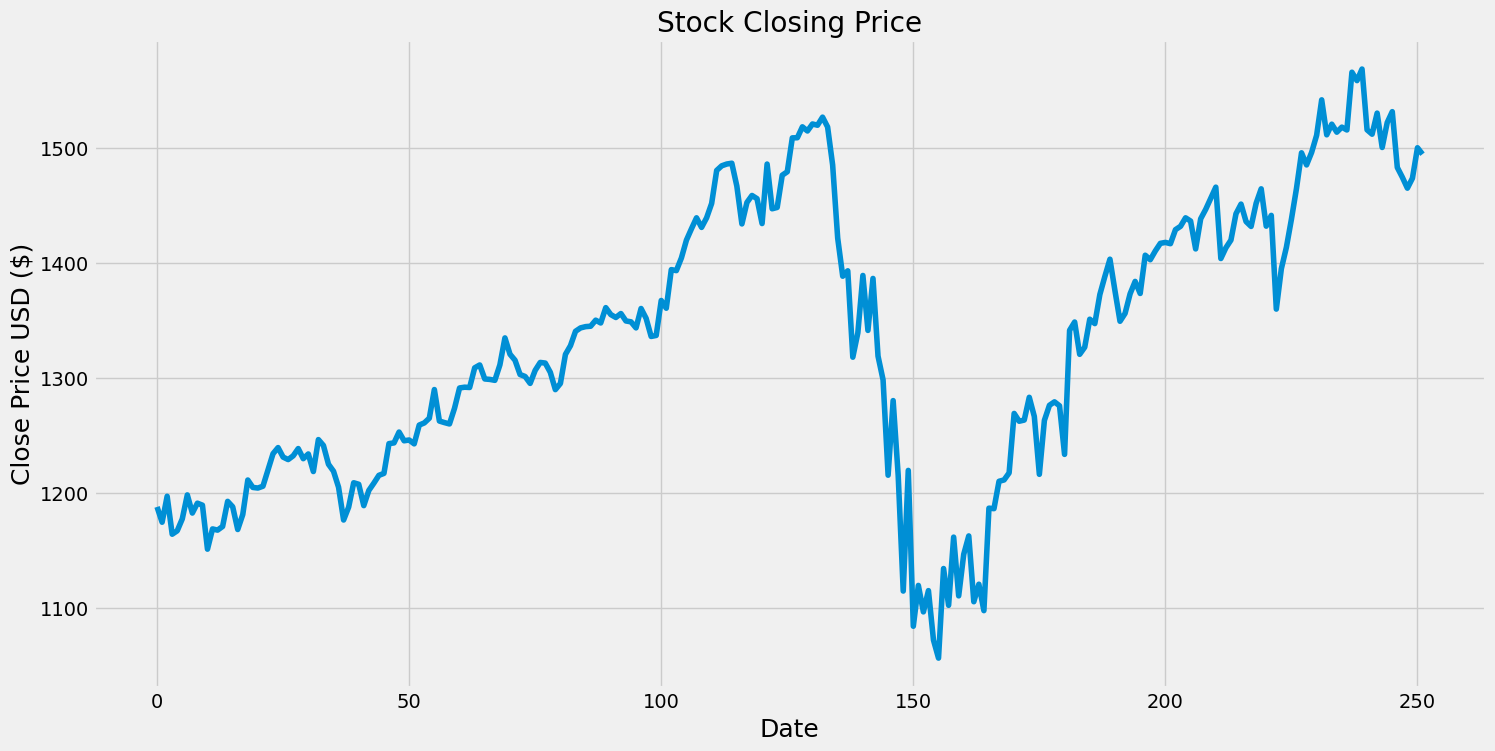

c:\Users\balbi\OneDrive\Desktop\Kanishk Jagya (AIML)\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\balbi\OneDrive\Desktop\Kanishk Jagya (AIML)\venv\Lib\site-packages\statsmodels\base\model.py:534: RuntimeWarning: invalid value encountered in scalar divide
  return -self.loglike(params, *args) / nobs
c:\Users\balbi\OneDrive\Desktop\Kanishk Jagya (AIML)\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


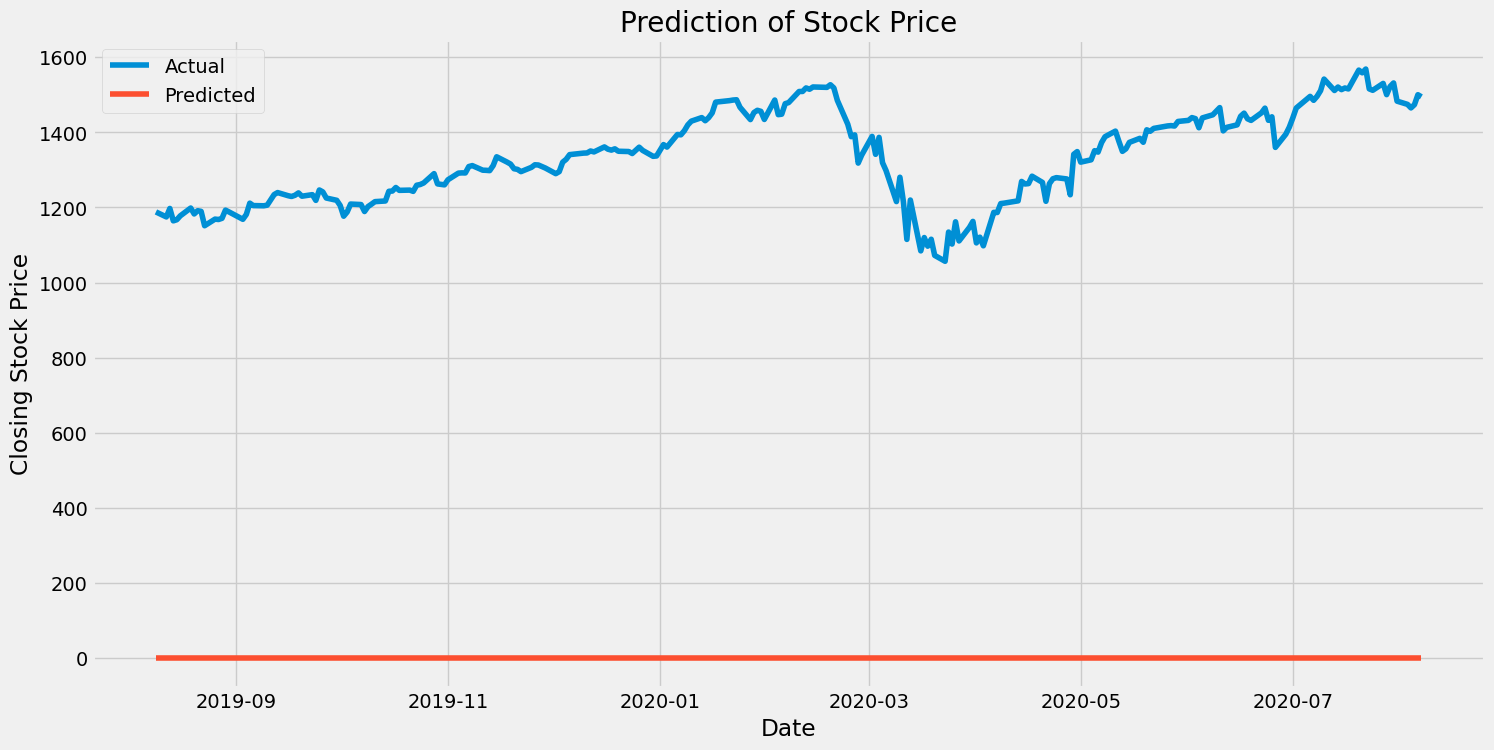

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset from a local file or a URL
# Replace 'YOUR_DATASET_PATH' with the actual file path or URL
stonks_data = pd.read_csv('./stonks.csv')

plt.style.use("fivethirtyeight")
plt.figure(figsize=(16, 8))
plt.title("Stock Closing Price")
plt.plot(stonks_data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

stonks_data = stonks_data[["Date", "Adj Close"]]
stonks_data = stonks_data.rename(columns={"Date": "ds", "Adj Close": "y"})

# Sort the data by date
stonks_data['ds'] = pd.to_datetime(stonks_data['ds'])
stonks_data.sort_values(by='ds', inplace=True)

# Split the data into training and testing sets
train_data = stonks_data[:-365]  # Use 365 days for testing
test_data = stonks_data[-365:]

# Fit an ARIMA model to the training data
p, d, q = 1, 1, 1  # Example ARIMA parameters
model = ARIMA(train_data['y'], order=(p, d, q))
model_fit = model.fit()  # Remove 'disp' argument

# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))

# Plot the actual and predicted values
plt.figure(figsize=(16, 8))
plt.title("Prediction of Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.plot(test_data['ds'], test_data['y'], label="Actual")
plt.plot(test_data['ds'], predictions, label="Predicted")
plt.legend()
plt.show()
